# Simulation & Rescheduling nach einem Tag (Regeneration)

In [1]:
import json
import pandas as pd
import numpy as np
import random

In [3]:
import utils.checker as check
import utils.presenter as show
import utils.converter as convert
import utils.schedule_solver__with_arrivals as ssv

In [4]:
from ProductionDaySimulation import ProductionDaySimulation

In [5]:
df_plan = pd.read_csv("data/03b_schedule_by_individual_flowtime_weighted.csv")
df_plan = df_plan.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan

,Job,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_000,0.00,M0,0.00,29,29.00,29.00
1,Job_000,0.00,M1,29.00,78,107.00,107.00
2,Job_000,0.00,M2,107.00,9,116.00,116.00
3,Job_000,0.00,M3,116.00,36,152.00,152.00
4,Job_000,0.00,M4,152.00,49,201.00,201.00
...,...,...,...,...,...,...,...
885,Job_088,5680.08,M9,9250.94,11,3581.86,9261.94
886,Job_088,5680.08,M6,9261.94,40,3621.86,9301.94
887,Job_088,5680.08,M7,9301.94,89,3710.86,9390.94
888,Job_088,5680.08,M4,9390.94,26,3736.86,9416.94


In [9]:
jssp_data = convert.get_jssp_from_schedule(df_plan)
show.print_jobs(jssp_data)

Job_000:  [[0, 29], [1, 78], [2, 9], [3, 36], [4, 49], [5, 11], [6, 62], [7, 56], [8, 44], [9, 21]]
Job_001:  [[0, 43], [2, 90], [4, 75], [9, 11], [3, 69], [1, 28], [6, 46], [5, 46], [7, 72], [8, 30]]
Job_002:  [[1, 91], [0, 85], [3, 39], [2, 74], [8, 90], [5, 10], [7, 12], [6, 89], [9, 45], [4, 33]]
Job_003:  [[1, 81], [2, 95], [0, 71], [4, 99], [6, 9], [8, 52], [7, 85], [3, 98], [9, 22], [5, 43]]
Job_004:  [[2, 14], [0, 6], [1, 22], [5, 61], [3, 26], [4, 69], [8, 21], [7, 49], [9, 72], [6, 53]]
Job_005:  [[2, 84], [1, 2], [5, 52], [3, 95], [8, 48], [9, 72], [0, 47], [6, 65], [4, 6], [7, 25]]
Job_006:  [[1, 46], [0, 37], [3, 61], [2, 13], [6, 32], [5, 21], [9, 32], [8, 89], [7, 30], [4, 55]]
Job_007:  [[2, 31], [0, 86], [1, 46], [5, 74], [4, 32], [6, 88], [8, 19], [9, 48], [7, 36], [3, 79]]
Job_008:  [[0, 76], [1, 69], [3, 76], [5, 51], [2, 85], [9, 11], [6, 40], [7, 89], [4, 26], [8, 74]]
Job_009:  [[1, 85], [0, 13], [2, 61], [6, 7], [8, 64], [9, 76], [5, 47], [3, 52], [4, 90], [7, 4

## First Day

In [12]:
day_start = 0
day_end = 1440

filt = (df_plan["Arrival"] >=  day_start) & (df_plan["Start"] < day_end)
df_schedule_first_day = df_plan[filt]
df_schedule_first_day

,Job,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_000,0.00,M0,0.00,29,29.00,29.00
1,Job_000,0.00,M1,29.00,78,107.00,107.00
2,Job_000,0.00,M2,107.00,9,116.00,116.00
3,Job_000,0.00,M3,116.00,36,152.00,152.00
4,Job_000,0.00,M4,152.00,49,201.00,201.00
...,...,...,...,...,...,...,...
191,Job_019,843.88,M0,1274.02,86,516.14,1360.02
192,Job_019,843.88,M1,1360.02,46,562.14,1406.02
200,Job_020,972.75,M0,1360.08,29,416.33,1389.08
201,Job_020,972.75,M1,1406.08,78,511.33,1484.08


In [14]:
simulation = ProductionDaySimulation(df_schedule_first_day, vc=0.25)
df_execution, df_undone = simulation.run(end_time=day_end)

[00:00:00] Job_000 started on M0
[00:38:02] Job_000 finished on M0 (after 38 minutes 03 seconds)
[00:38:02] Job_000 started on M1
[01:24:55] Job_001 started on M0
[01:59:37] Job_000 finished on M1 (after 81 minutes 35 seconds)
[01:59:37] Job_002 started on M1
[01:59:37] Job_000 started on M2
[02:01:40] Job_001 finished on M0 (after 36 minutes 44 seconds)
[02:06:43] Job_000 finished on M2 (after 07 minutes 06 seconds)
[02:06:43] Job_000 started on M3
[02:07:55] Job_001 started on M2
[02:35:01] Job_000 finished on M3 (after 28 minutes 18 seconds)
[02:35:01] Job_000 started on M4
[03:30:27] Job_001 finished on M2 (after 82 minutes 32 seconds)
[03:35:23] Job_000 finished on M4 (after 60 minutes 22 seconds)
[03:35:23] Job_000 started on M5
[03:37:15] Job_002 finished on M1 (after 97 minutes 38 seconds)
[03:37:15] Job_003 started on M1
[03:37:15] Job_002 started on M0
[03:37:55] Job_001 started on M4
[03:37:59] Job_004 started on M2
[03:45:23] Job_000 finished on M5 (after 10 minutes)
[03:45

In [16]:
df_execution

,Job,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
0,Job_000,0.00,M0,0.00,38.05,38.05,38.05
1,Job_000,0.00,M1,38.05,81.58,119.63,119.63
2,Job_000,0.00,M2,119.63,7.10,126.73,126.73
3,Job_000,0.00,M3,126.73,28.30,155.03,155.03
4,Job_000,0.00,M4,155.03,60.36,215.39,215.39
...,...,...,...,...,...,...,...
155,Job_019,843.88,M0,1287.87,90.85,534.84,1378.72
156,Job_019,843.88,M1,1378.72,39.24,574.08,1417.96
157,Job_020,972.75,M0,1378.72,24.33,430.30,1403.05
158,Job_020,972.75,M1,1417.96,133.26,578.47,1551.22


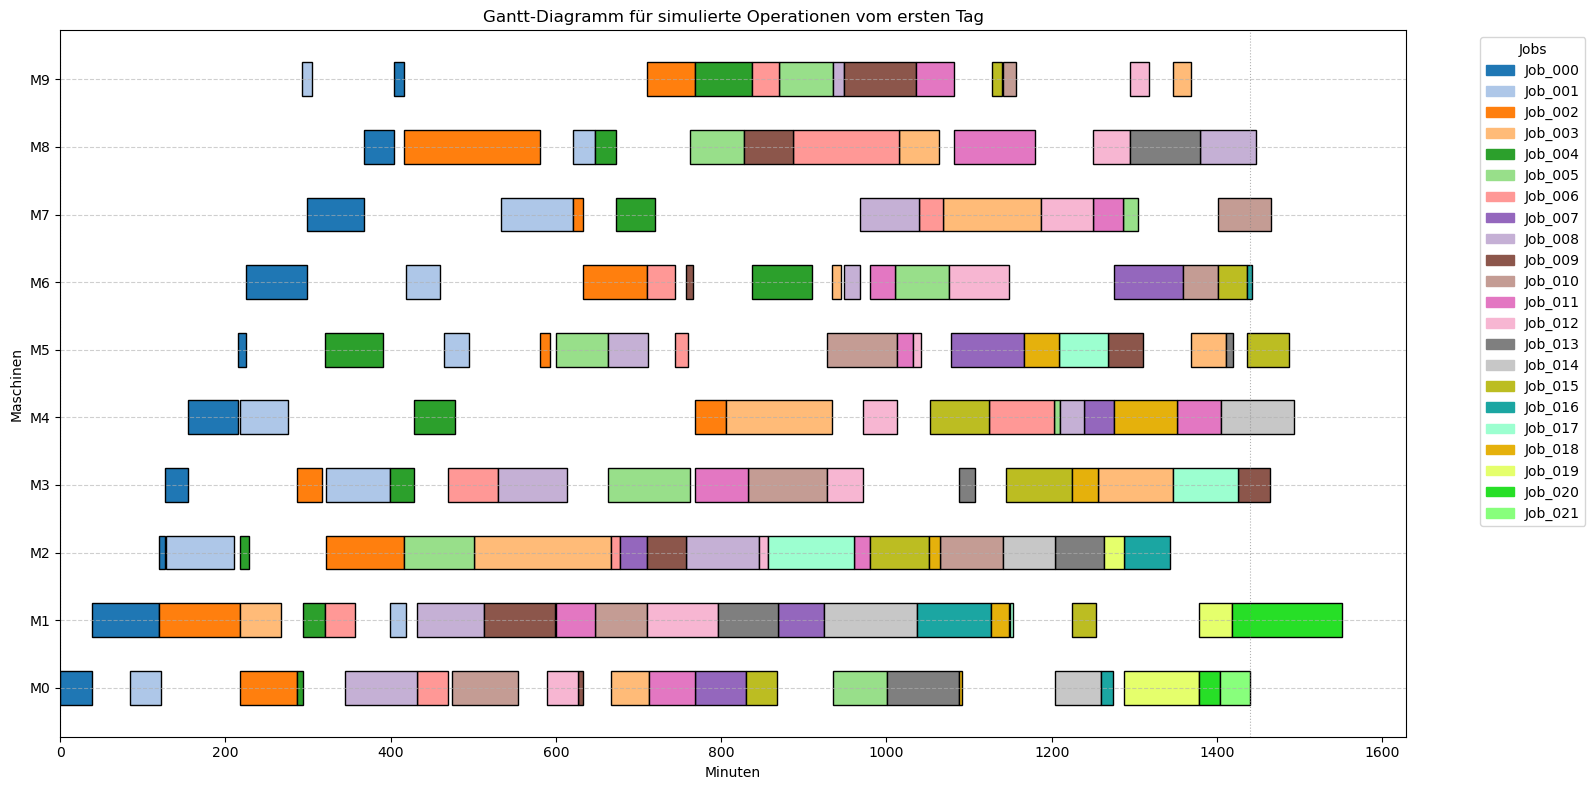

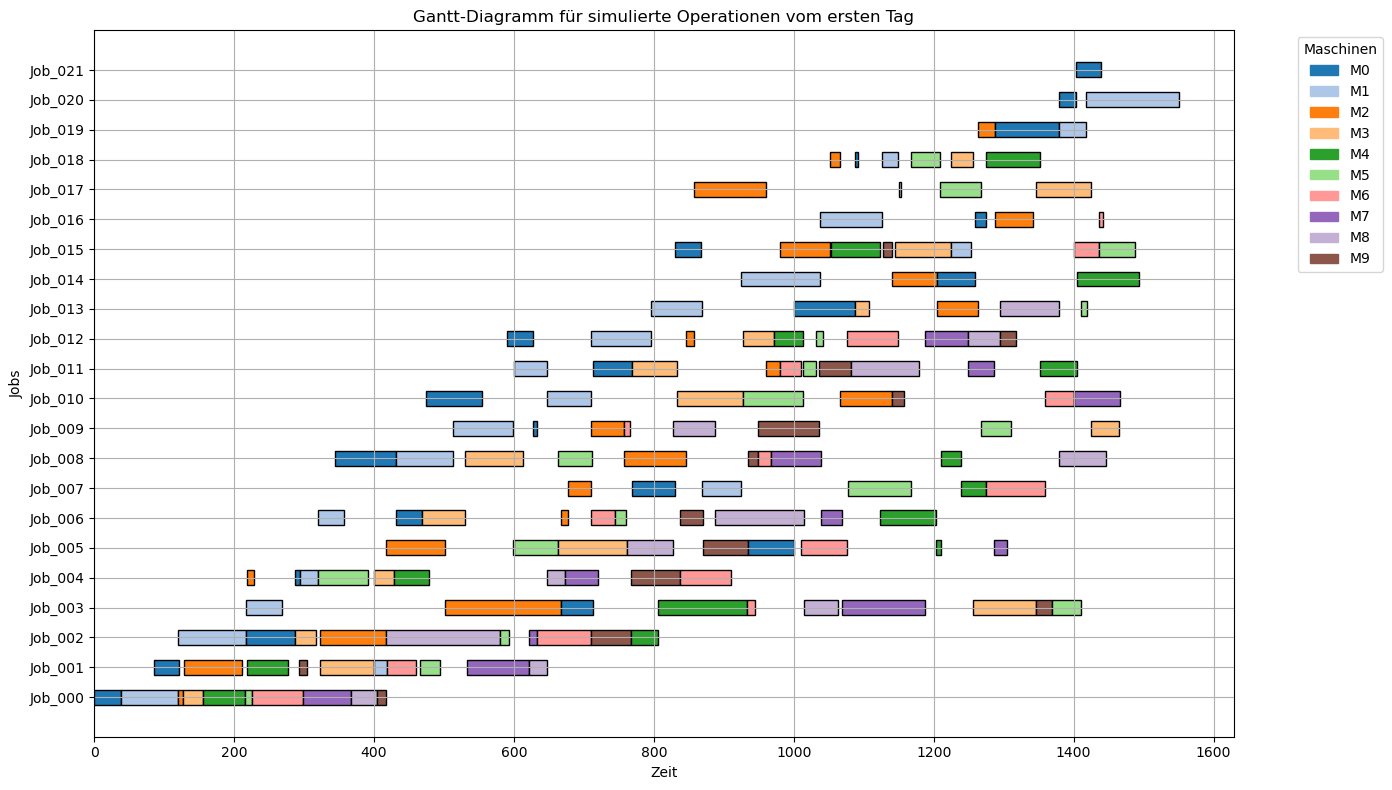

In [18]:
show.plot_gantt_machines(df_execution, "Gantt-Diagramm für simulierte Operationen vom ersten Tag", duration_column = "Simulated Processing Time")
show.plot_gantt_jobs(df_execution, "Gantt-Diagramm für simulierte Operationen vom ersten Tag", duration_column = "Simulated Processing Time")

In [20]:
# Operationen, die nicht am ersten Tag gestartet sind
convert.get_jssp_from_schedule(df_undone)

{'Job_017': [[8, 48]]}

### Verbliebene Jobs
- "ursprünglicher Plan" - "simulierter Tag"

In [22]:
#df_rest = df_plan.merge(df_schedule_first_day[["Job", "Machine"]], on=["Job", "Machine"], how="left", indicator=True)
#df_rest = df_rest[df_rest["_merge"] == "left_only"].drop(columns=["_merge"])

df_rest = df_plan.merge(df_execution[["Job", "Machine"]], on=["Job", "Machine"], how="left", indicator=True)
df_rest = df_rest[df_rest["_merge"] == "left_only"].drop(columns=["_merge"])
df_rest

,Job,Arrival,Machine,Start,Processing Time,Flow time,End
76,Job_007,329.63,M8,1476.20,19,1165.57,1495.20
77,Job_007,329.63,M9,1605.08,48,1323.45,1653.08
78,Job_007,329.63,M7,1653.08,36,1359.45,1689.08
79,Job_007,329.63,M3,1689.08,79,1438.45,1768.08
98,Job_009,429.20,M4,1497.96,90,1158.76,1587.96
...,...,...,...,...,...,...,...
885,Job_088,5680.08,M9,9250.94,11,3581.86,9261.94
886,Job_088,5680.08,M6,9261.94,40,3621.86,9301.94
887,Job_088,5680.08,M7,9301.94,89,3710.86,9390.94
888,Job_088,5680.08,M4,9390.94,26,3736.86,9416.94


In [24]:
jssp_data_rest = convert.get_jssp_from_schedule(df_rest)
show.print_jobs(jssp_data_rest)

Job_007:  [[8, 19], [9, 48], [7, 36], [3, 79]]
Job_009:  [[4, 90], [7, 45]]
Job_010:  [[4, 26], [8, 74]]
Job_013:  [[7, 12], [6, 89], [9, 45], [4, 33]]
Job_014:  [[6, 9], [8, 52], [7, 85], [3, 98], [9, 22], [5, 43]]
Job_015:  [[7, 72], [8, 30]]
Job_016:  [[8, 64], [9, 76], [5, 47], [3, 52], [4, 90], [7, 45]]
Job_017:  [[8, 48], [9, 72], [0, 47], [6, 65], [4, 6], [7, 25]]
Job_018:  [[8, 21], [7, 49], [9, 72], [6, 53]]
Job_019:  [[5, 74], [4, 32], [6, 88], [8, 19], [9, 48], [7, 36], [3, 79]]
Job_020:  [[2, 9], [3, 36], [4, 49], [5, 11], [6, 62], [7, 56], [8, 44], [9, 21]]
Job_021:  [[2, 90], [4, 75], [9, 11], [3, 69], [1, 28], [6, 46], [5, 46], [7, 72], [8, 30]]
Job_022:  [[1, 91], [0, 85], [3, 39], [2, 74], [8, 90], [5, 10], [7, 12], [6, 89], [9, 45], [4, 33]]
Job_023:  [[1, 81], [2, 95], [0, 71], [4, 99], [6, 9], [8, 52], [7, 85], [3, 98], [9, 22], [5, 43]]
Job_024:  [[2, 14], [0, 6], [1, 22], [5, 61], [3, 26], [4, 69], [8, 21], [7, 49], [9, 72], [6, 53]]
Job_025:  [[2, 84], [1, 2], [5

In [14]:
# Arrival Times der verbliebenen Jobs (wichtig keiene Duplikate)
df_arrival_rest = df_rest[["Job", "Arrival"]]
df_arrival_rest = df_arrival_rest.drop_duplicates(subset='Job', keep='first')
df_arrival_rest

,Job,Arrival
76,Job_007,329.63
97,Job_009,429.20
107,Job_010,473.82
135,Job_013,559.14
144,Job_014,561.12
...,...,...
840,Job_084,5519.69
850,Job_085,5542.52
860,Job_086,5591.92
870,Job_087,5644.29


## Rescheduling für die nächsten Tage

In [15]:
def solve_jssp_weighted_with_fixed_operations_fast(job_dict, df_arrivals, df_executed,
                                                    solver_time_limit=300, epsilon=0.0,
                                                    arrival_column="Ankunftszeit (Minuten)",
                                                    reschedule_start=1440):
    """
    Schnelle Rescheduling-Variante mit fixierten Operationen.
    Plant alle verbleibenden Jobs ab reschedule_start, unter Berücksichtigung der letzten
    Endzeit bereits ausgeführter Operationen pro Job.
    """

    import pulp
    import pandas as pd

    print("🔁 Starte schnelles Rescheduling ab t =", reschedule_start)

    # Vorbereitung: Ankunftszeiten & Sortierung
    df_arrivals = df_arrivals.sort_values(arrival_column).reset_index(drop=True)
    arrival_times = df_arrivals.set_index("Job")[arrival_column].to_dict()
    job_names = list(df_arrivals.sort_values(arrival_column, ascending=False)["Job"])
    num_jobs = len(job_names)
    all_ops = [job_dict[job] for job in job_names]
    all_machines = {op[0] for job in all_ops for op in job}

    print(f"🔹 {num_jobs} Jobs erkannt")

    # Schnellzugriff vorbereiten
    job_index_map = {name: j for j, name in enumerate(job_names)}
    arrival_lookup = arrival_times

    # Letzte Endzeit bereits geplanter Operationen pro Job
    last_executed_end = df_executed.groupby("Job")["End"].max().to_dict()

    # Fixierte Maschinen-ID extrahieren
    df_executed = df_executed[df_executed["End"] >= reschedule_start].copy()
    df_executed["MachineID"] = df_executed["Machine"].str.extract(r"M(\d+)").astype(int)

    # Fixe Operationen gruppiert pro Maschine
    fixed_ops_dict = {
        m: list(zip(gr["Start"], gr["End"], gr["Job"]))
        for m, gr in df_executed.groupby("MachineID")
    }

    # LP-Modell
    prob = pulp.LpProblem("FastJSSP", pulp.LpMinimize)

    # Startzeit-Variablen
    starts = {
        (j, o): pulp.LpVariable(f"start_{j}_{o}", lowBound=0, cat="Continuous")
        for j in range(num_jobs)
        for o in range(len(all_ops[j]))
    }

    # Endzeit-Variablen je Job
    job_ends = {
        j: pulp.LpVariable(f"job_end_{j}", lowBound=0, cat="Continuous")
        for j in range(num_jobs)
    }

    # Gewichte
    weights = {j: 1 / (1 + arrival_lookup[job_names[j]]) for j in range(num_jobs)}

    # Zielfunktion
    prob += pulp.lpSum([
        weights[j] * (job_ends[j] - arrival_lookup[job_names[j]])
        for j in range(num_jobs)
    ])

    # Technologische Reihenfolge + individuelle Startbedingungen
    for j, job_name in enumerate(job_names):
        job = job_dict[job_name]
        earliest_start = max(
            arrival_lookup[job_name],
            last_executed_end.get(job_name, reschedule_start)
        )
        prob += starts[(j, 0)] >= earliest_start
        for o in range(1, len(job)):
            prob += starts[(j, o)] >= starts[(j, o - 1)] + job[o - 1][1]

    # Maschinenkonflikte (optimiert)
    bigM = 1e5
    for m in sorted(all_machines):
        ops = [(j, o, d) for j in range(num_jobs)
               for o, (mach, d) in enumerate(all_ops[j]) if mach == m]

        # Konflikte zwischen neuen Jobs (nur wenn j1 ≠ j2)
        for i in range(len(ops)):
            j1, o1, d1 = ops[i]
            for j2, o2, d2 in ops[i + 1:]:
                if j1 == j2:
                    continue  # gleicher Job → technologisch geregelt
                y = pulp.LpVariable(f"y_{j1}_{o1}_{j2}_{o2}", cat="Binary")
                prob += starts[(j1, o1)] + d1 + epsilon <= starts[(j2, o2)] + bigM * (1 - y)
                prob += starts[(j2, o2)] + d2 + epsilon <= starts[(j1, o1)] + bigM * y

        # Konflikte mit fixierten Operationen
        for j1, o1, d1 in ops:
            job1 = job_names[j1]
            job1_arrival = arrival_lookup.get(job1, 0)

            for fixed_start, fixed_end, fixed_job in fixed_ops_dict.get(m, []):
                if fixed_end + epsilon < job1_arrival:
                    continue
                y_fix = pulp.LpVariable(f"y_fix_{j1}_{o1}_{fixed_job}", cat="Binary")
                prob += starts[(j1, o1)] + d1 + epsilon <= fixed_start + bigM * (1 - y_fix)
                prob += fixed_end + epsilon <= starts[(j1, o1)] + bigM * y_fix

    # Endzeitbindung je Job
    for j in range(num_jobs):
        last_op = len(all_ops[j]) - 1
        prob += job_ends[j] >= starts[(j, last_op)] + all_ops[j][last_op][1]

    # Solver
    solver = pulp.HiGHS_CMD(msg=True, timeLimit=solver_time_limit)
    prob.solve(solver)

    # Ergebnis
    schedule_data = []
    for (j, o), var in sorted(starts.items()):
        start = var.varValue
        if start is not None:
            machine, duration = all_ops[j][o]
            end = start + duration
            schedule_data.append({
                "Job": job_names[j],
                "Machine": f"M{machine}",
                "Start": round(start, 2),
                "Processing Time": duration,
                "End": round(end, 2)
            })

    df_schedule = pd.DataFrame(schedule_data)
    df_schedule["Arrival"] = df_schedule["Job"].map(arrival_lookup)
    df_schedule["Flow time"] = df_schedule["End"] - df_schedule["Arrival"]
    df_schedule = df_schedule[["Job", "Arrival", "Machine", "Start", "Processing Time", "Flow time", "End"]]

    #total_weighted_flowtime = round(pulp.value(prob.objective), 3)
    print("✅ Fertig!")
    return df_schedule


In [16]:
# Reduktion der bereits ausgeführten Operationen auf die relevanten für die nächsten Tage
df_execution_important = df_execution[df_execution["End"] >= 1440]
df_execution_important

,Job,Arrival,Machine,Start,Simulated Processing Time,Flow time,End
99,Job_010,473.82,M6,1408.63,38.54,973.35,1447.17
124,Job_013,559.14,M8,1419.28,78.87,939.01,1498.15
128,Job_014,561.12,M4,1358.75,97.36,894.99,1456.11
137,Job_016,637.51,M2,1378.38,76.80,817.67,1455.18
141,Job_017,653.44,M3,1369.04,103.28,818.88,1472.32
148,Job_019,843.88,M0,1385.77,96.97,638.86,1482.74
150,Job_020,972.75,M1,1406.08,88.98,522.31,1495.06


In [17]:
time_limit = 60*60*1    # 1h

df_plan2 = solve_jssp_weighted_with_fixed_operations_fast(
    job_dict=jssp_data_rest,
    df_arrivals=df_arrival_rest,
    df_executed=df_execution_important,
    solver_time_limit=time_limit,
    epsilon=0.6,
    arrival_column="Arrival",
    reschedule_start=1440
)
df_plan2

🔁 Starte schnelles Rescheduling ab t = 1440
🔹 79 Jobs erkannt
Running HiGHS 1.10.0 (git hash: n/a): Copyright (c) 2025 HiGHS under MIT licence terms
Set option time_limit to 3600
Set option solution_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/dc9619454c594a5d8770573cc6427c6b-pulp.sol"
Set option log_file to "/var/folders/88/5n59t5yx3095jhz9lldbm0kr0000gn/T/dc9619454c594a5d8770573cc6427c6b-pulp.HiGHS_log"
Set option write_solution_to_file to true
Number of BV entries in BOUNDS section is 27092
MIP  dc9619454c594a5d8770573cc6427c6b-pulp has 55002 rows; 27910 cols; 163919 nonzeros; 27092 integer variables (27092 binary)
Coefficient ranges:
  Matrix [1e+00, 1e+05]
  Cost   [2e-04, 3e-03]
  Bound  [1e+00, 1e+00]
  RHS    [2e+00, 1e+05]
Presolving model
54829 rows, 27800 cols, 163605 nonzeros  0s
29359 rows, 27799 cols, 87291 nonzeros  0s
29317 rows, 27778 cols, 87207 nonzeros  0s

Solving MIP model with:
   29317 rows
   27778 cols (27039 binary, 0 integer, 0 implied int., 739

,Job,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_088,5680.08,M0,7181.46,76,1577.38,7257.46
1,Job_088,5680.08,M1,7257.46,69,1646.38,7326.46
2,Job_088,5680.08,M3,7654.86,76,2050.78,7730.86
3,Job_088,5680.08,M5,7754.46,51,2125.38,7805.46
4,Job_088,5680.08,M2,7805.46,85,2210.38,7890.46
...,...,...,...,...,...,...,...
734,Job_009,429.20,M7,1760.55,45,1376.35,1805.55
735,Job_007,329.63,M8,1498.75,19,1188.12,1517.75
736,Job_007,329.63,M9,1517.75,48,1236.12,1565.75
737,Job_007,329.63,M7,1565.75,36,1272.12,1601.75


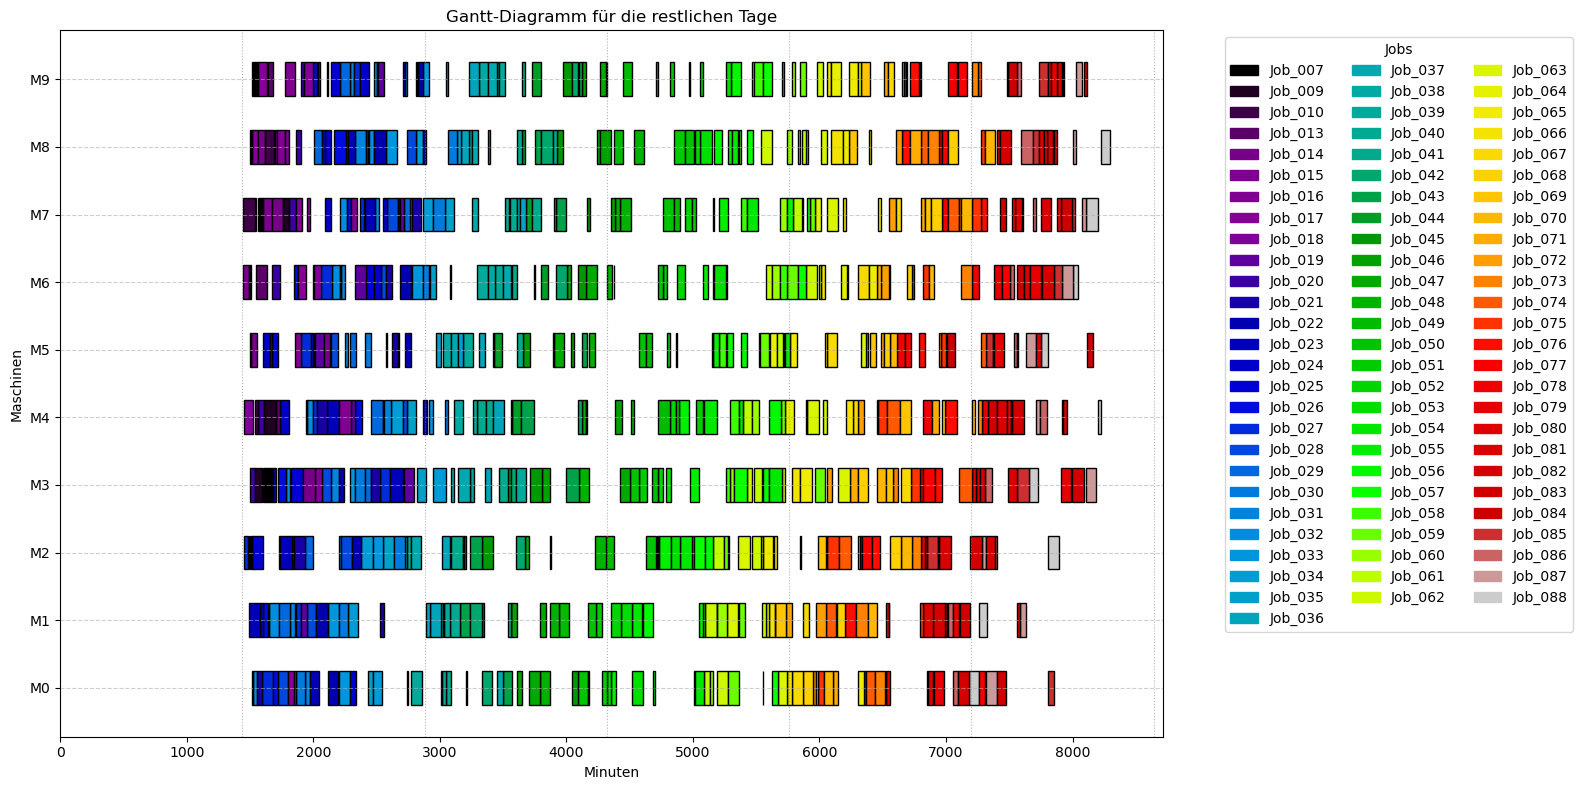

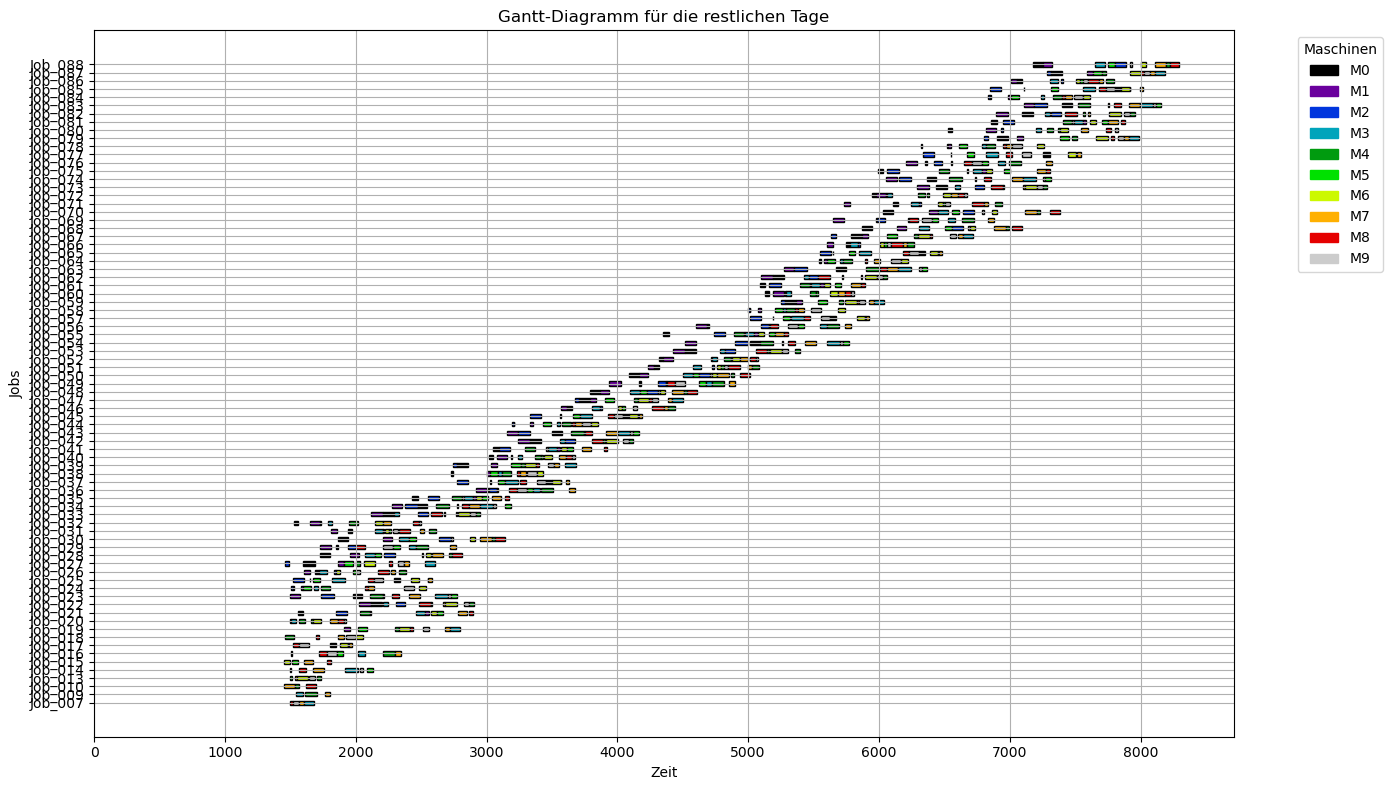

True

In [18]:
df = df_plan2
job_data = jssp_data_rest
text = "Gantt-Diagramm für die restlichen Tage"
show.plot_gantt_machines(df, text, duration_column = "Processing Time")
show.plot_gantt_jobs(df, text, duration_column = "Processing Time")

check.check_all_constraints(df, job_data)

## Zusammenführung der Simulation mit dem restlichen Plan

In [19]:
df_execution = df_execution.rename(columns={"Simulated Processing Time": "Processing Time"})

df_schedule_mix = pd.concat([df_execution, df_plan2], ignore_index=True)
df_schedule_mix = df_schedule_mix.sort_values(by="Start").reset_index(drop=True)
df_schedule_mix

,Job,Arrival,Machine,Start,Processing Time,Flow time,End
0,Job_000,0.00,M0,0.00,32.08,32.08,32.08
1,Job_000,0.00,M1,32.08,95.20,127.28,127.28
2,Job_001,84.93,M0,84.93,54.83,54.83,139.76
3,Job_000,0.00,M2,127.28,9.03,136.31,136.31
4,Job_002,106.18,M1,127.28,88.01,109.11,215.29
...,...,...,...,...,...,...,...
885,Job_087,5644.29,M3,8108.06,79.00,2542.77,8187.06
886,Job_088,5680.08,M7,8108.66,89.00,2517.58,8197.66
887,Job_083,5502.24,M5,8116.26,43.00,2657.02,8159.26
888,Job_088,5680.08,M4,8197.66,26.00,2543.58,8223.66


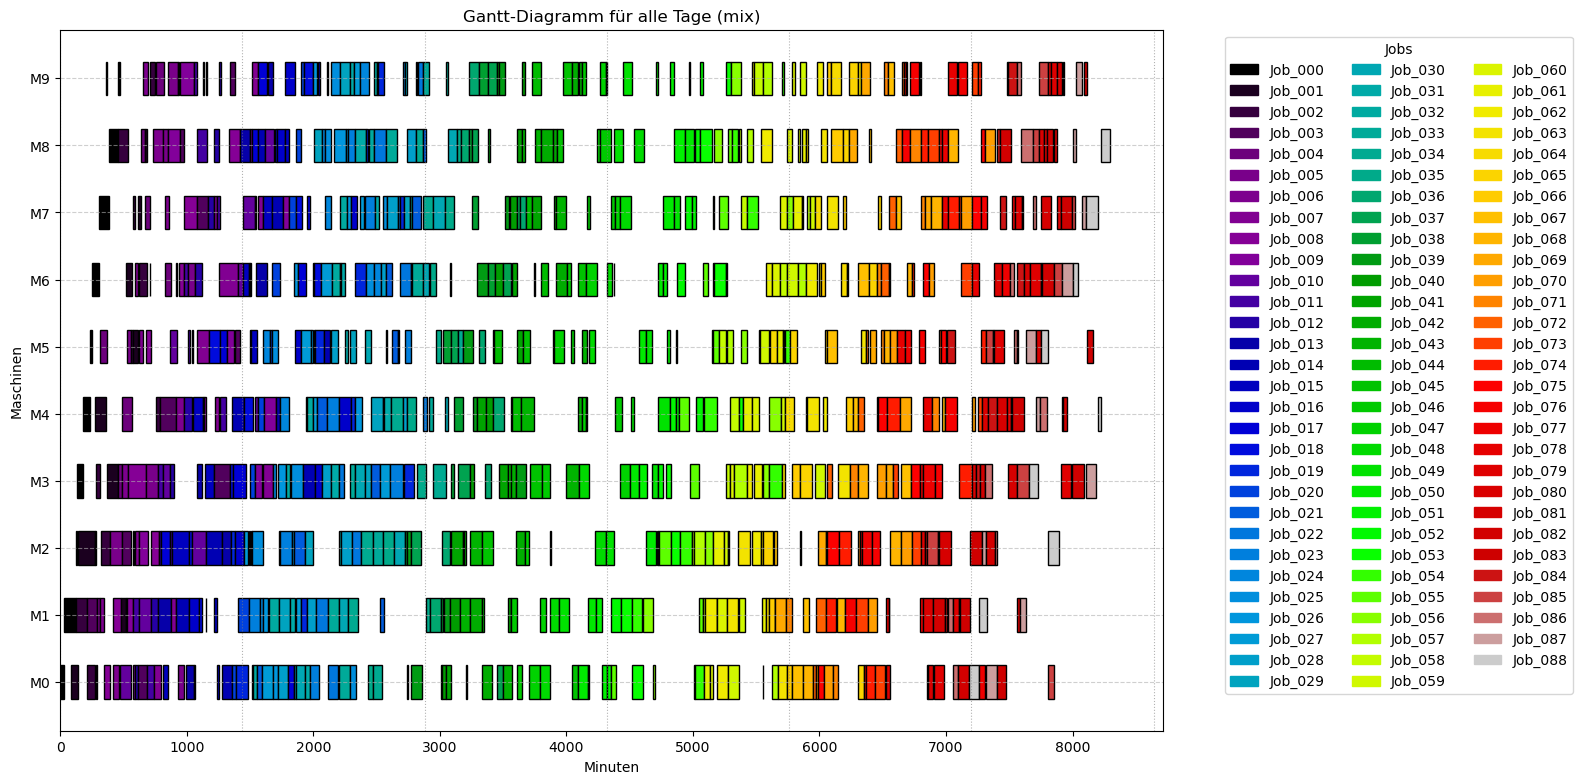

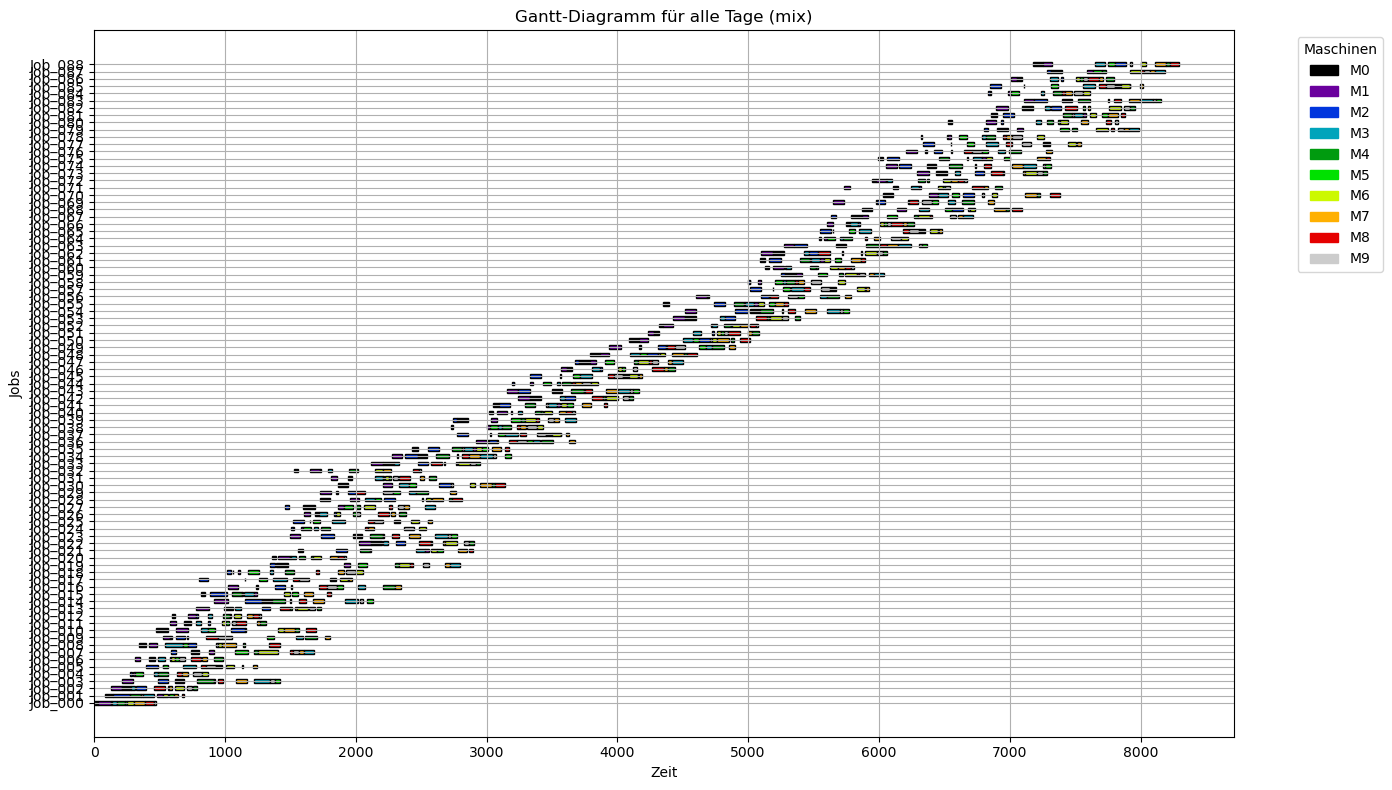

True

In [20]:
df = df_schedule_mix
job_data = jssp_data
text = "Gantt-Diagramm für alle Tage (mix)"
show.plot_gantt_machines(df, text, duration_column = "Processing Time")
show.plot_gantt_jobs(df, text, duration_column = "Processing Time")

check.check_all_constraints(df, job_data)

In [22]:
df_execution.to_csv("data/04a_schedule_simulation.csv", index = False)
df_plan2.to_csv("data/04b_schedule_plan2.csv", index = False)
df_schedule_mix.to_csv("data/04c_schedule_mix.csv", index = False)